# Reciprocal space:

## Introduction:

In X-ray diffraction we are using x-rays with a particular frequency (e.g. $Cu K_{\alpha}\approx 1.5406 \overset{\circ}{A}$) to probe a crystalline structure. 
From the obtained diffraction pattern; we want to reconstruct the crystal structure of our material.
The problem at hand is equivalent to figuring out the spacing and dimensions of the two slits used from the diffraction pattern of a [double slit experiment](https://en.wikipedia.org/wiki/Double-slit_experiment).

## Signal in time space (1D):

As an example, we will go over the problem of having a recording of multiple notes played simultaneously and we want to know their frequencies. 

Below we have the signal obtained by adding cos functions of five random frequencies:

In [1]:
# Required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, signal

Frequencies used are: [1.4577309864501626, 1.5326550246219968, 5.993013375375626, 6.934323547001536, 7.754527444548058]


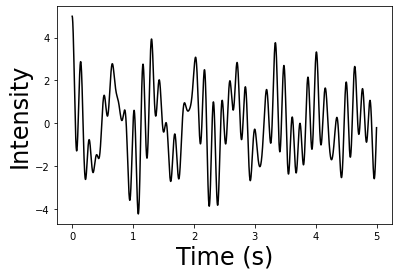

In [49]:
fs = 1000 # number of samples taken per second
frequencies = np.random.uniform(1, 10, size=(1,5)) # Creates five random numbers between 1 and 10
t = np.reshape(np.linspace(0,5,5*fs, endpoint=False), (5*fs,1))
i = np.sum(np.cos(2 * np.pi *t*frequencies), axis=1)
plt.plot(t, i, c='k')
plt.xlabel('Time (s)', fontsize=24)
plt.ylabel('Intensity', fontsize=24)
print('Frequencies used are: %s'%sorted(frequencies[0]))

## Furiour transforms:

A way to extract the individual frequencies $f$ from our function $g$ measured in the time domain $t$ is by using Fourier transforms $\hat{g}$, which are mathematically defined as:

$\hat{g}(f)=\int_{-\infty}^{\infty}g(t) e^{-2\pi i ft}dt$

An intuitive video of what this function does can be found [here](https://www.youtube.com/watch?v=spUNpyF58BY).

What it does though is convert our function from our real space/time domain to a reciprocal space/frequency domain:

Detected frequencies are: [1.4 6.  7.  7.8]


/home/giovanni/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/giovanni/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


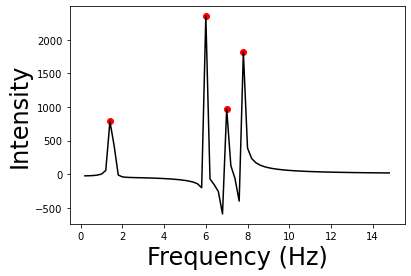

In [53]:
ft = np.fft.fft(i)
f = fft.fftfreq(len(i))*fs
index = np.where(np.logical_and(f>0, f<15)) # Zoom into region of interest
plt.plot(f[index], ft[index[0]].real, c='k')
plt.xlabel('Frequency (Hz)', fontsize=24)
plt.ylabel('Intensity (a.u.)', fontsize=24)

peaks, _  = signal.find_peaks(ft[index], threshold=10)
plt.scatter(f[index][peaks], ft[index][peaks], c='r')
print('Detected frequencies are: %s'%f[index][peaks])

From the example above, we can see that the peaks of the real part of the Fourier transform corresponding to the frequencies of the notes played. We can also then use the inverse Fourier transform to go from reciprocal space back to real space. The beauty of this mathematical tool is that our signal is often less complicated in one domain than in the other, be it real or reciprocal space.

The same way frequency is defined as the reciprical of time, we can have the reciprical of our wavelength $\lambda$ described by our wavevector $k$ as:

$f=\frac{1}{t} \; \text{and} \; k = \frac{1}{\lambda}$

## Expanding into 2D:

In the same way, we can extend this idea to multiple dimentions assuming that our axis are independent of eachother. Here we are going to add sinusodial functions in both the $x$ and the $y$ axis.

If we take the simplest model to describe the band structure of a 2D lattice as a lattice of [particles in a box](https://en.wikipedia.org/wiki/Particle_in_a_box), then our wave function $\psi(x,y)$ will take the form:

$\psi(x,y) = A sin(\frac{n\pi}{a}x) + B sin(\frac{n\pi}{b}y)$

Where $a$ and $b$ are our lattice parameters and since the orbital is proportional to $|\psi(x,y)|^2$, we have an equation to represent our lattice.

The same way time and frequency are reciprical to each other also applies to real and reciprical space, e.g. $a^*=\frac{1}{a}$ and $b^*=\frac{1}{b}$. 


This sort of relationship is what causes [Heisenburg's uncertinty principle](https://en.wikipedia.org/wiki/Uncertainty_principle), as quantum mechanically the momentum of a partical is the Fourier transform of its position, thus the product of their uncertanties cannot be smaller than a constant value, which is:

$\sigma_x \sigma_p \geq \frac{\hbar}{2}$

Frequency used along x is 9.119543463580582 and along y 3.907011722647045


<Figure size 432x288 with 0 Axes>

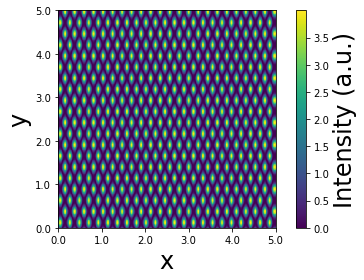

In [55]:
f = np.random.normal(5, 2, 2)

x = np.tile(np.linspace(0,5,500), (500,1))
y = np.transpose(x)

i = (np.sin(np.pi * x * f[0]) + np.sin(np.pi * y * f[1]))**2

plt.figure()
fig, ax = plt.subplots(1)
plt.pcolor(i)
cbar = plt.colorbar()
cbar.set_label('Intensity (a.u.)', fontsize=24)

plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xticklabels(np.round(np.linspace(0,5,6),2))
ax.set_yticklabels(np.round(np.linspace(0,5,6),2))
plt.tight_layout()
print('Frequency used along x is %s'%f[0] +' and along y %s' %f[1])

This 2D repeating structure resembles a plain of atoms 

## Taking the Fourier transform in 2D:

When we shine x-rays to our sample, these will interact with the electron orbitals of our lattice, resulting in a diffraction pattern that will correspond to the Fourier transform of the orbital itself. The distance from the origin to the diffraction spots that appear will correspond to the spacing of the atoms along that plain.

<Figure size 432x288 with 0 Axes>

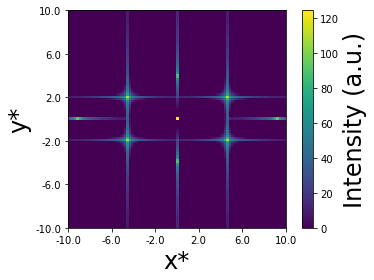

In [56]:
ft = np.fft.fft2(i)
fshift = 20*np.log(abs(np.fft.fftshift(ft))+1)
fshift = fshift-fshift[250,250]/2
fshift[np.where(fshift<=0)]=0
# Plot in Fourier space
plt.figure()
fig, ax = plt.subplots(1)
plt.pcolor(fshift)
cbar = plt.colorbar()
cbar.set_label('Intensity (a.u.)', fontsize=24)

ax.set_xticklabels(np.linspace(-10,10,6))
ax.set_yticklabels(np.linspace(-10,10,6))
plt.xlabel('x*', fontsize=24)
plt.ylabel('y*', fontsize=24)
plt.xlim(200,300)
plt.ylim(200,300)
plt.gca().set_aspect('equal', adjustable='box')

Here we have a relatively small lattice, thus the diffraction peaks in the figure above are quite broud, but as we increase the periodicity, these peaks will narrow.

N.B., that for a single crystal, the diffracted signal in Fourier space will only appear at a specific point, which is what we observe in Ewald's sphere.

## Extracting the frequencies

We need to now find the three different peaks and calculate their distance from the origin

In [57]:
xy = fshift[250:,250:] # Zoom into top right quadrant as four fold symmetry due to orthogonal axis

index = np.where(xy>np.max(xy)/2)
xs, ys = index[0][1:], index[1][1:] # Exclude the origin from consideration
# Find indecies of 3 diffraction spots
px, py, pxy = np.where(xs==0), np.where(ys==0), np.where(np.logical_and(xs>0, ys>0))
peak_x, peak_y, peak_xy = np.where(xy==np.max(xy[xs[px], ys[px]])), np.where(xy==np.max(xy[xs[py], ys[py]])), np.where(xy==np.max(xy[xs[pxy], ys[pxy]]))
fs = np.linspace(0,250,250)/5
# Print frequencies found
print('Frequency in x is %s'%np.sqrt(fs[peak_x[0]]**2+fs[peak_x[1]]**2))
print('Frequency in y is %s'%np.sqrt(fs[peak_y[0]]**2+fs[peak_y[1]]**2))
print('Frequency in xy is %s'%np.sqrt(fs[peak_xy[0]]**2+fs[peak_xy[1]]**2))

Frequency in x is [9.23694779]
Frequency in y is [4.01606426]
Frequency in xy is [5.03611896]


## Ewald's sphere

Ewald's sphere is a geometrical reppresentation of Bragg's law in reciprocal space. The assumption that we make is that the wavelength $\lambda_{in}$ that we shine to our crystal sample will be the same as the wavelength that is reflected and measured by our detector $\lambda_{out}$

If we draw a sphere with radious equal to $k= \frac{1}{\lambda_{in}}= \frac{1}{\lambda_{out}}$, then we can show that Bragg's law is only satisfied at points along the surface of our sphere as:

![alt text](Ewald.svg "Ewald's sphere")

$2k_{in}sin(\theta)=2k_{out}sin(\theta)=d^*$

Since $k_{in}=k_{out}=\frac{1}{\lambda}$ and $d^*=\frac{1}{d}$, we can then rearrange to obtain Bragg's law:

$\lambda = 2d sin(\theta)$

Q.E.D. only points on the surface of our Ewald's sphere satisfy Bragg's law.